# Importing Libraries

In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Loading Dataset

In [44]:
detailed_data= pd.read_excel('sales_data.xlsx')
detailed_data.head()

,Restaurant ID,Subzone,City,Overview,Metric,April,May,June,July,August,September
0,802364,JP Nagar,Bengaluru,Sales,Sales (Rs),5527.00,8759.00,5812.00,5429.00,4260.00,1118.00
1,802364,JP Nagar,Bengaluru,Sales,Delivered orders,25.00,36.00,25.00,25.00,17.00,5.00
2,802364,JP Nagar,Bengaluru,Sales,Average order value (Rs),221.08,243.31,232.48,217.16,250.59,223.60
3,802364,JP Nagar,Bengaluru,Sales,Market share (%),0.03,0.07,0.04,0.07,0.52,1.48
4,802364,JP Nagar,Bengaluru,Customer experience,Average rating,2.19,2.27,1.78,2.08,1.13,3.78


In [45]:
item_data= pd.read_excel('item_sales.xlsx')
item_data.head()

,Restaurant ID,Subzone,City,Item name,Item category,Item subcategory,Metric,April,May,June,July,August,September
0,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Item quantity sold,2,4,1,1,2,-
1,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Unit cost of item (₹),65,65,65,65,65,-
2,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Orders with item,2,3,1,1,1,-
3,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Item quantity per order,1,1.33,1,1,2,-
4,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Item rating,0,0.67,1,1,1,-


In [6]:
detailed_data.shape

(1748, 11)

- There are 1748 rows and 11 columns in detailed monthly data

In [8]:
item_data.shape

(2725, 13)

- There are 2725 rows and 13 columns in item sales monthly data

# Basic Information About Data

In [9]:
detailed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant ID  1748 non-null   int64  
 1   Subzone        1748 non-null   object 
 2   City           1748 non-null   object 
 3   Overview       1748 non-null   object 
 4   Metric         1748 non-null   object 
 5   April          1748 non-null   float64
 6   May            1748 non-null   float64
 7   June           1748 non-null   float64
 8   July           1748 non-null   float64
 9   August         1748 non-null   float64
 10  September      1748 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 150.3+ KB


- The datatype of all columns in detailed dataset is correct so need not change any datatype

In [10]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725 entries, 0 to 2724
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Restaurant ID     2725 non-null   int64 
 1   Subzone           2725 non-null   object
 2   City              2725 non-null   object
 3   Item name         2725 non-null   object
 4   Item category     2725 non-null   object
 5   Item subcategory  2725 non-null   object
 6   Metric            2725 non-null   object
 7   April             2725 non-null   object
 8   May               2725 non-null   object
 9   June              2725 non-null   object
 10  July              2725 non-null   object
 11  August            2725 non-null   object
 12  September         2725 non-null   object
dtypes: int64(1), object(12)
memory usage: 276.9+ KB


- The datatype of monthly columns is object which needs to be changed to numeric

# Data Cleaning

### Converting datatype of Monthly columns in item sales data

In [13]:
item_data.head()

,Restaurant ID,Subzone,City,Item name,Item category,Item subcategory,Metric,April,May,June,July,August,September
0,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Item quantity sold,2,4,1,1,2,-
1,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Unit cost of item (₹),65,65,65,65,65,-
2,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Orders with item,2,3,1,1,1,-
3,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Item quantity per order,1,1.33,1,1,2,-
4,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Item rating,0,0.67,1,1,1,-


In [15]:
item_data['April'].unique()

array([2, 65, 1, 0, 4, 3, 1.33, '-', 10, 3.82, 1.5, 3.31, 165, 3.12, 139,
       16, 115, 12, 3.66, 69, 3.41, 3.95, 4.49, 5, 3.35, 209, 137, 11,
       149, 1.1, 179, 6, 95, 180, 160, 89, 39, 135, 25, 1.56, 219, 120.2,
       75, 3.83, 50, 62, 55, 1.13, 3.78, 28, 27, 1.04, 4.01, 7, 1.4, 169,
       17, 15, 8, 2.12, 79, 4.05, 18, 1.12, 250, 92, 67, 1.37, 4.22, 99,
       42, 205, 3.98, 30, 4.04, 4.02, 195, 2.93, 3.84, 3.23, 19, 4.28, 13,
       2.6, 3.54, 2.26, 1.25, 4.29, 1.17, 3.62, 21, 1.11, 3.71, 22, 1.69,
       14, 1.08, 3.56, 26, 37, 35, 1.06, 3.92, 830, 3.75, 3.55, 23, 1.21,
       3.96, 415, 3.49, 72, 53, 1.36, 3.9, 2.75, 4.31, 94, 3.74, 105, 109,
       45, 1.67, 125, 4.03, 130, 4.32, 90, 2.63, 49, 3.08, 1.2, 2.77,
       3.18, 119, 2.28, 4.45, 1.6, 9, 1.8, 4.27, 439, 289, 85, 59, 259,
       240, 234, 1.75, 185, 129, 189, 32, 1.52, 4.14, 1.87, 60, 80, 1.43,
       4.38, 100, 2.5, 24, 1.85, 1.44, 239], dtype=object)

- After finding unique values in this column we need to replace '-' this value to convert the datatype

In [47]:
item_data['April']= np.where(item_data['April']=='-',np.nan,item_data['April'])

In [48]:
item_data['April']= item_data['April'].fillna(item_data['April'].median())

In [49]:
item_data['April']= item_data['April'].astype(float)

In [35]:
item_data['May'].unique()

array([4, 65, 3, 1.33, 0.67, '-', 10, 8, 1.25, 3.84, 2, 1, 3.3, 5, 165,
       3.19, 179, 0, 23, 115, 3.6, 129, 2.78, 12, 69, 11, 1.09, 3.33, 139,
       3.94, 7, 1.14, 4.49, 77.5, 2.97, 110, 149, 109, 108.33, 180, 94,
       135, 28, 18, 1.56, 1.15, 219, 137, 99, 75, 85, 1.5, 45.67, 89, 50,
       220, 15, 6, 1.2, 86, 74, 1.16, 3.78, 22, 20, 1.1, 4.02, 169, 1.57,
       1.32, 79, 9, 1.12, 4.14, 3.75, 250, 60, 51, 1.18, 4.15, 0.69, 41,
       205, 4.08, 29, 4.05, 4.12, 195, 2.67, 13, 4.09, 21, 19, 1.11, 3.41,
       17, 3.13, 4.39, 3.83, 3.77, 3.59, 16, 3.34, 1.05, 32, 3.88, 3.9,
       1.06, 3.32, 1.44, 4.07, 415, 3.48, 70, 55, 1.27, 4.11, 2.25, 105,
       95, 1.67, 185, 45, 1.29, 209, 125, 119, 91, 83, 81, 94.2, 4.03,
       130, 90, 3.98, 4.18, 3.85, 2.58, 49, 100, 59, 3.62, 3.28, 2.6,
       2.12, 1.62, 4.4, 1.8, 2.5, 159, 14, 1.4, 4.24, 2.33, 343.09, 0.24,
       250.11, 289, 155, 125.67, 39, 189, 3.96, 3.7, 80, 4.48, 1.17, 1.3],
      dtype=object)

In [50]:
item_data['May']= np.where(item_data['May']=='-',np.nan,item_data['May'])

In [51]:
item_data['May']= item_data['May'].fillna(item_data['May'].median())

In [52]:
item_data['May']= item_data['May'].astype(float)

In [39]:
item_data['June'].unique()

array([1, 65, 4, 2, 0, 75, 7, 5, 1.4, 3.11, '-', 165, 1.64, 90, 179, 139,
       6, 115, 3.6, 3, 129, 2.89, 69, 3.28, 1.5, 4.01, 4.42, 209, 137, 9,
       149, 1.29, 102, 126.5, 101.67, 1.2, 146.33, 180, 160, 14, 96.14,
       10, 135, 132.33, 48, 24, 3.24, 95, 219, 109, 85, 59, 99, 89, 3.71,
       84, 1.22, 3.78, 23, 22, 1.05, 3.76, 169, 17, 15, 1.89, 2.69, 79,
       0.5, 4.09, 3.5, 250, 62, 58, 1.07, 4.13, 1.11, 3.04, 44, 205, 31,
       3.85, 8, 1.33, 16, 4.11, 195, 2.27, 11, 4.33, 36, 3.34, 3.55, 1.14,
       3.15, 2.81, 1.1, 3.87, 4.06, 28, 27, 1.04, 3.51, 21, 1.48, 12,
       1.09, 3.66, 18, 1.06, 3.54, 1.17, 3.91, 4.04, 34, 3.89, 3.93, 2.97,
       26, 1.13, 3.73, 1.18, 3.44, 46, 1.41, 4.21, 3.82, 1.77, 185, 45,
       119, 105, 199, 87, 4.03, 130, 2.6, 2.84, 3.1, 2.52, 100, 1.67,
       3.67, 1.85, 1.92, 1.57, 4.4, 4.29, 13, 1.3, 39, 308.74, 38, 1.03,
       3.43, 234.56, 1.12, 359, 1.62, 225, 155, 117.18, 19, 1.16, 1.9,
       2.5, 125, 3.99, 60, 80, 3.58, 4.47, 1.25, 249, 5

In [53]:
item_data['June']= np.where(item_data['June']=='-',np.nan,item_data['June'])

In [54]:
item_data['June']= item_data['June'].fillna(item_data['June'].median())

In [55]:
item_data['June']= item_data['June'].astype(float)

In [56]:
item_data['July'].unique()

array([1, 65, 2, 0, '-', 9, 6, 1.5, 3.91, 5, 129, 0.89, 3.24, 165, 3.27,
       139, 13, 115, 12, 1.08, 3.62, 2.89, 4, 69, 3.25, 4.13, 3, 1.67,
       4.38, 109, 121.67, 149, 125, 108.33, 135, 11, 7, 1.57, 3.34, 219,
       95, 1.25, 85, 1.33, 59, 155, 75, 195, 50, 30, 89, 15, 82, 68, 1.21,
       3.8, 14, 4.1, 150, 1.16, 179, 0.6, 169, 1.17, 2.97, 79, 3.61, 3.94,
       22, 20, 1.1, 3.85, 250, 51, 1.35, 4.05, 200, 34, 205, 31, 4.03, 44,
       43, 1.02, 4.01, 2.14, 4.42, 21, 1.4, 3.42, 3.49, 1.44, 3.17, 3.07,
       1.09, 1.2, 36, 99, 35, 1.03, 3.7, 23, 17, 3.82, 10, 4.2, 25, 3.74,
       3.95, 26, 3.92, 19, 3.36, 27, 1.23, 3.77, 415, 18, 3.45, 56, 4.16,
       1.52, 105, 145, 39, 45, 119, 225, 8, 1.14, 102, 84.6, 83, 130, 90,
       100, 4.14, 4.21, 2.52, 49, 3.05, 4.25, 2.78, 2.76, 16, 4.43, 4.23,
       62, 303.68, 57, 3.48, 265.67, 247, 209, 104.45, 1.7, 1.56, 1.6,
       159, 2.67, 4.46, 55, 189, 1.8, 2.51, 1.29, 0.99], dtype=object)

In [57]:
item_data['July']= np.where(item_data['July']=='-',np.nan,item_data['July'])

In [58]:
item_data['July']= item_data['July'].fillna(item_data['July'].median())

In [59]:
item_data['July']= item_data['July'].astype(float)

In [60]:
item_data['August'].unique()

array([2, 65, 1, '-', 4, 3, 1.33, 3.94, 165, 3.16, 139, 115, 3.6, 69,
       3.32, 5, 3.87, 7, 149, 6, 1.17, 0, 121.67, 180, 160, 89, 25, 135,
       13, 1.92, 3.33, 95, 109, 195, 50, 30, 75, 15, 71, 1.25, 3.84, 20,
       4.08, 11, 3.42, 8, 179, 1.14, 1.9, 169, 1.5, 3.98, 3.06, 79, 3.58,
       23, 1.15, 31, 1.24, 3.91, 250, 58, 1.22, 4.05, 200, 99, 4.06, 38,
       205, 48, 45, 1.07, 16, 3.92, 1.97, 12, 1.09, 4.1, 56, 34, 1.65,
       3.54, 3.48, 3.15, 150, 14, 3.93, 3.55, 21, 3.63, 43, 29, 1.48,
       3.79, 4.27, 3.72, 4.11, 32, 3.95, 24, 3.34, 27, 26, 1.04, 3.86,
       415, 3.41, 106, 83, 1.28, 4.03, 19, 18, 1.06, 3.8, 105, 39, 119,
       10, 91.8, 9, 1.11, 81, 79.8, 89.4, 1.59, 87, 91, 85, 130, 90, 4.12,
       100, 4.18, 4.16, 2.4, 49, 155, 59, 1.75, 4.34, 2.79, 3.59, 1.2,
       1.4, 4.45, 129, 44, 290.59, 3.5, 219, 709, 1.67, 2.67, 225, 108.17,
       1.56, 879, 125, 189, 1.88, 2.71], dtype=object)

In [61]:
item_data['August']= np.where(item_data['August']=='-',np.nan,item_data['August'])

In [62]:
item_data['August']= item_data['August'].fillna(item_data['August'].median())

In [63]:
item_data['August']= item_data['August'].astype(float)

In [64]:
item_data['September'].unique()

array(['-', 1, 209, 0, 135, 149, 125, 165, 6, 2, 3, 3.51, 75, 15, 139, 19,
       16, 1.19, 3.88, 4.03, 150, 89, 3.69, 169, 3.99, 3.26, 179, 3.86, 5,
       65, 4, 1.25, 3.98, 9, 4.06, 99, 4.19, 7, 205, 4.05, 3.96, 3.92,
       195, 1.9, 115, 4.07, 3.4, 3.45, 3.75, 3.54, 3.68, 3.76, 4.33, 3.63,
       250, 4.08, 3.93, 3.94, 8, 79, 3.21, 1.29, 3.87, 95, 1.5, 69, 105,
       85, 130, 4.38, 2.37, 59, 4.76, 119, 109, 4.17, 289, 3.5, 229, 219,
       114, 189], dtype=object)

In [66]:
item_data['September']= np.where(item_data['September']=='-',np.nan,item_data['September'])

In [67]:
item_data['September']= item_data['September'].fillna(item_data['September'].median())

In [68]:
item_data['September']= item_data['September'].astype(float)

In [69]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725 entries, 0 to 2724
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Restaurant ID     2725 non-null   int64  
 1   Subzone           2725 non-null   object 
 2   City              2725 non-null   object 
 3   Item name         2725 non-null   object 
 4   Item category     2725 non-null   object 
 5   Item subcategory  2725 non-null   object 
 6   Metric            2725 non-null   object 
 7   April             2725 non-null   float64
 8   May               2725 non-null   float64
 9   June              2725 non-null   float64
 10  July              2725 non-null   float64
 11  August            2725 non-null   float64
 12  September         2725 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 276.9+ KB


- We have successfully converted the datatypes of monthly columns

# Exploratory Data Analysis (EDA)

## Check For Missing Values

In [75]:
detailed_data.isna().sum()

Restaurant ID    0
Subzone          0
City             0
Overview         0
Metric           0
April            0
May              0
June             0
July             0
August           0
September        0
dtype: int64

In [76]:
item_data.isna().sum()

Restaurant ID       0
Subzone             0
City                0
Item name           0
Item category       0
Item subcategory    0
Metric              0
April               0
May                 0
June                0
July                0
August              0
September           0
dtype: int64

- There are no missing values in data

## Check for Duplicate Data

In [77]:
detailed_data.duplicated().sum()

0

In [78]:
item_data.duplicated().sum()

0

- There are no duplicates in the dataset

## Statistical Summary

In [72]:
detailed_data.describe()

,Restaurant ID,April,May,June,July,August,September
count,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000
mean,300442.763158,173.664994,190.144565,203.218387,195.983450,205.041041,25.111487
std,298169.475342,2100.021310,2009.862581,2162.222382,2098.713568,2349.836953,338.254384
min,65679.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86988.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,145657.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707077.000000,7.000000,5.000000,7.055000,7.062500,6.000000,0.000000
max,927783.000000,80895.000000,74510.000000,81078.000000,77408.000000,89947.000000,13523.000000


In [74]:
item_data.describe()

,Restaurant ID,April,May,June,July,August,September
count,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000
mean,385338.277064,14.640780,13.480407,12.903116,14.161483,13.286613,4.679229
std,332400.431007,43.796128,38.104626,37.178316,39.478215,42.589410,22.076757
min,65679.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80566.000000,1.000000,1.500000,1.400000,1.000000,1.250000,1.000000
50%,148086.000000,1.185000,1.500000,1.400000,1.020000,1.250000,1.000000
75%,772637.000000,1.400000,1.500000,1.400000,1.520000,1.250000,1.000000
max,927783.000000,830.000000,415.000000,359.000000,415.000000,879.000000,289.000000


In [79]:
detailed_data.head()

,Restaurant ID,Subzone,City,Overview,Metric,April,May,June,July,August,September
0,802364,JP Nagar,Bengaluru,Sales,Sales (Rs),5527.00,8759.00,5812.00,5429.00,4260.00,1118.00
1,802364,JP Nagar,Bengaluru,Sales,Delivered orders,25.00,36.00,25.00,25.00,17.00,5.00
2,802364,JP Nagar,Bengaluru,Sales,Average order value (Rs),221.08,243.31,232.48,217.16,250.59,223.60
3,802364,JP Nagar,Bengaluru,Sales,Market share (%),0.03,0.07,0.04,0.07,0.52,1.48
4,802364,JP Nagar,Bengaluru,Customer experience,Average rating,2.19,2.27,1.78,2.08,1.13,3.78


In [80]:
item_data.head()

,Restaurant ID,Subzone,City,Item name,Item category,Item subcategory,Metric,April,May,June,July,August,September
0,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Item quantity sold,2.0,4.00,1.0,1.0,2.0,1.0
1,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Unit cost of item (₹),65.0,65.00,65.0,65.0,65.0,1.0
2,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Orders with item,2.0,3.00,1.0,1.0,1.0,1.0
3,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Item quantity per order,1.0,1.33,1.0,1.0,2.0,1.0
4,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Item rating,0.0,0.67,1.0,1.0,1.0,1.0


In [145]:
item_data['Metric'].unique()

array(['Item quantity sold', 'Unit cost of item (₹)', 'Orders with item',
       'Item quantity per order', 'Item rating'], dtype=object)

In [138]:
df_items=item_data.groupby(['Metric'])[['April','May','June','July','August','September']].sum()

In [139]:
df_items.head()

,April,May,June,July,August,September
Metric,,,,,,
Item quantity per order,636.145,719.84,702.07,586.88,654.68,556.48
Item quantity sold,1759.655,1812.00,1789.20,1703.08,1807.00,650.00
Item rating,510.815,612.70,602.87,464.52,556.91,593.42
Orders with item,1527.655,1643.00,1577.20,1509.08,1587.00,629.00
Unit cost of item (₹),35461.855,31946.57,30489.65,34326.48,31600.43,10322.00


In [141]:
# Transposing the data
df_items=df_items.T

In [142]:
df_items

Metric,Item quantity per order,Item quantity sold,Item rating,Orders with item,Unit cost of item (₹)
April,636.145,1759.655,510.815,1527.655,35461.855
May,719.840,1812.000,612.700,1643.000,31946.570
June,702.070,1789.200,602.870,1577.200,30489.650
July,586.880,1703.080,464.520,1509.080,34326.480
August,654.680,1807.000,556.910,1587.000,31600.430
September,556.480,650.000,593.420,629.000,10322.000


## Monthly Item Quantity Sold

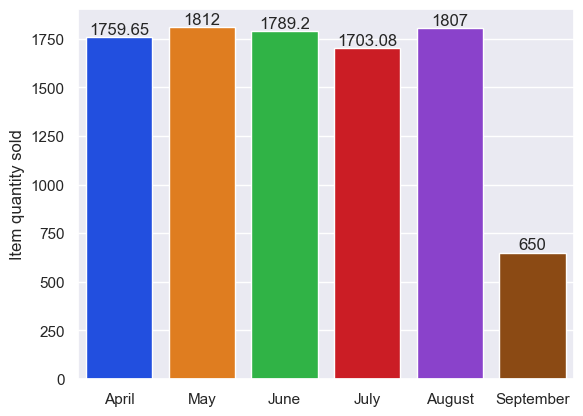

In [134]:
ax=sns.barplot(y=df_items['Item quantity sold'],x=df_items.index,palette='bright')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

- August month had highest number of items sold as compared to other months
- September month had lowest number of items sold indicating very few orders were placed in this month
- June month also had highest number of items sold after August month indicating increase in demand from June to August

In [136]:
sales_df= detailed_data.groupby(['Metric'])[['April','May','June','July','August','September']].sum()

In [137]:
sales_df.head()

,April,May,June,July,August,September
Metric,,,,,,
Ads CTR (%),7.77,7.18,7.99,22.14,39.58,0.0
Ads ROI,1.60,1.32,1.07,1.03,7.35,0.0
Ads impressions,2651.00,5028.00,6498.00,590.00,5860.00,0.0
Ads menu opens,206.00,361.00,519.00,38.00,455.00,0.0
Ads orders,11.00,17.00,18.00,1.00,30.00,0.0


In [140]:
# Transposing the data
sales_df= sales_df.T

## Monthly Total Sales

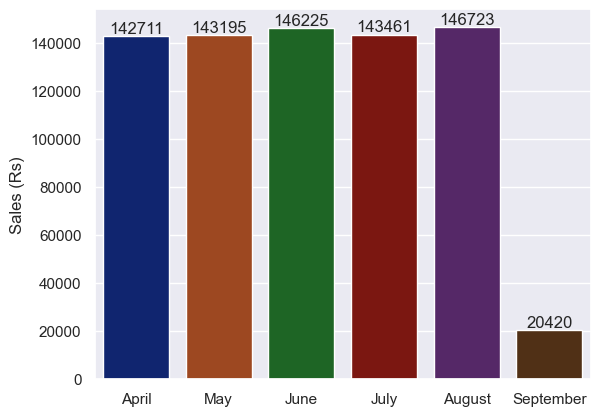

In [132]:
ax=sns.barplot(y=sales_df['Sales (Rs)'],x=sales_df.index,palette='dark')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

- August month had highest number of sales as compared to other months
- September month had lowest number of sales indicating very few orders were placed in this month
- June month also had highest number of sales after August month indicating increase in sales from June to August

In [146]:
item_data.head()

,Restaurant ID,Subzone,City,Item name,Item category,Item subcategory,Metric,April,May,June,July,August,September
0,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Item quantity sold,2.0,4.00,1.0,1.0,2.0,1.0
1,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Unit cost of item (₹),65.0,65.00,65.0,65.0,65.0,1.0
2,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Orders with item,2.0,3.00,1.0,1.0,1.0,1.0
3,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Item quantity per order,1.0,1.33,1.0,1.0,2.0,1.0
4,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Item rating,0.0,0.67,1.0,1.0,1.0,1.0


## Top 5 Items Sold

In [170]:
items= item_data.groupby(['Item name','Metric'])[['April','May','June','July','August','September']].sum()
items

April     May    June   July  August  \
Item name  Metric                                                            
1 Egg      Item quantity per order    2.120    1.57    1.89   1.00    1.33   
           Item quantity sold        17.000   11.00   17.00   9.00    8.00   
           Item rating                0.000    1.32    2.69   2.97    3.06   
           Orders with item           8.000    7.00    9.00   9.00    6.00   
           Unit cost of item (₹)     15.000   15.00   15.00  15.00   15.00   
...                                     ...     ...     ...    ...     ...   
White Rice Item quantity per order    4.785    3.00    4.04   3.48    3.50   
           Item quantity sold        17.185    6.00   12.40  15.04   10.50   
           Item rating                1.185    0.00    1.40   2.04    2.50   
           Orders with item           9.185    6.00   10.40  11.04   10.50   
           Unit cost of item (₹)    131.185  195.00  131.40  67.04   67.50   

                                    September  
Item name  Metric                              
1 Egg      Item quantity per order       1.00  
           Item quantity sold            1.00  
           Item rating                   3.26  
           Orders with item              1.00  
           Unit cost of item (₹)        15.00  
...                                       ...  
White Rice Item quantity per order       4.00  
           Item quantity sold            4.00  
           Item rating                   2.00  
           Orders with item              3.00  
           Unit cost of item (₹)        67.00  

[2140 rows x 6 columns]

In [203]:
i=1
d={}
while i<len(items):
    d[items.index[i][0]]=items.values[i]
    i+=5

In [204]:
items_sold= pd.DataFrame(data=d)

In [205]:
items_sold= items_sold.T
items_sold

,0,1,2,3,4,5
1 Egg,17.000,11.0,17.0,9.00,8.00,1.0
2 Chapati,10.000,17.0,14.8,16.04,17.25,7.0
2 Paratha,4.000,3.0,2.4,2.02,2.25,2.0
2 Parotta,20.000,10.0,24.0,23.00,33.00,6.0
2 Poori,1.185,1.0,2.0,2.00,1.00,1.0
...,...,...,...,...,...,...
Veg Noodles with Gobi Manchurian [Half],1.000,2.0,1.4,1.02,1.25,1.0
Veg Pulao,2.185,4.5,2.8,3.00,2.50,2.0
Veg Roll,2.185,3.5,2.4,2.00,5.25,3.0
Veg Roll with Cheese,1.185,1.0,1.4,1.02,1.00,1.0


In [206]:
items_sold.columns=['April', 'May', 'June', 'July', 'August', 'September']

In [207]:
items_sold['Total Quantity Sold'] = items_sold[['April', 'May', 'June', 'July', 'August', 'September']].sum(axis=1)

In [208]:
items_sold.sort_values(by='Total Quantity Sold',ascending=False,inplace=True)

In [211]:
items_sold=items_sold.head(5)
items_sold

,April,May,June,July,August,September,Total Quantity Sold
Chicken Biryani,78.370,102.5,102.4,90.06,104.50,24.0,501.830
Egg Fried Rice,128.740,74.0,74.4,81.02,77.75,14.0,449.910
Biryani Rice with 1 Egg,72.000,70.0,65.0,69.00,106.00,9.0,391.000
Chicken Kabab [250 grams],42.000,41.0,44.0,34.00,38.00,7.0,206.000
Gobi Manchurian,27.555,33.5,35.8,45.02,46.25,5.0,193.125


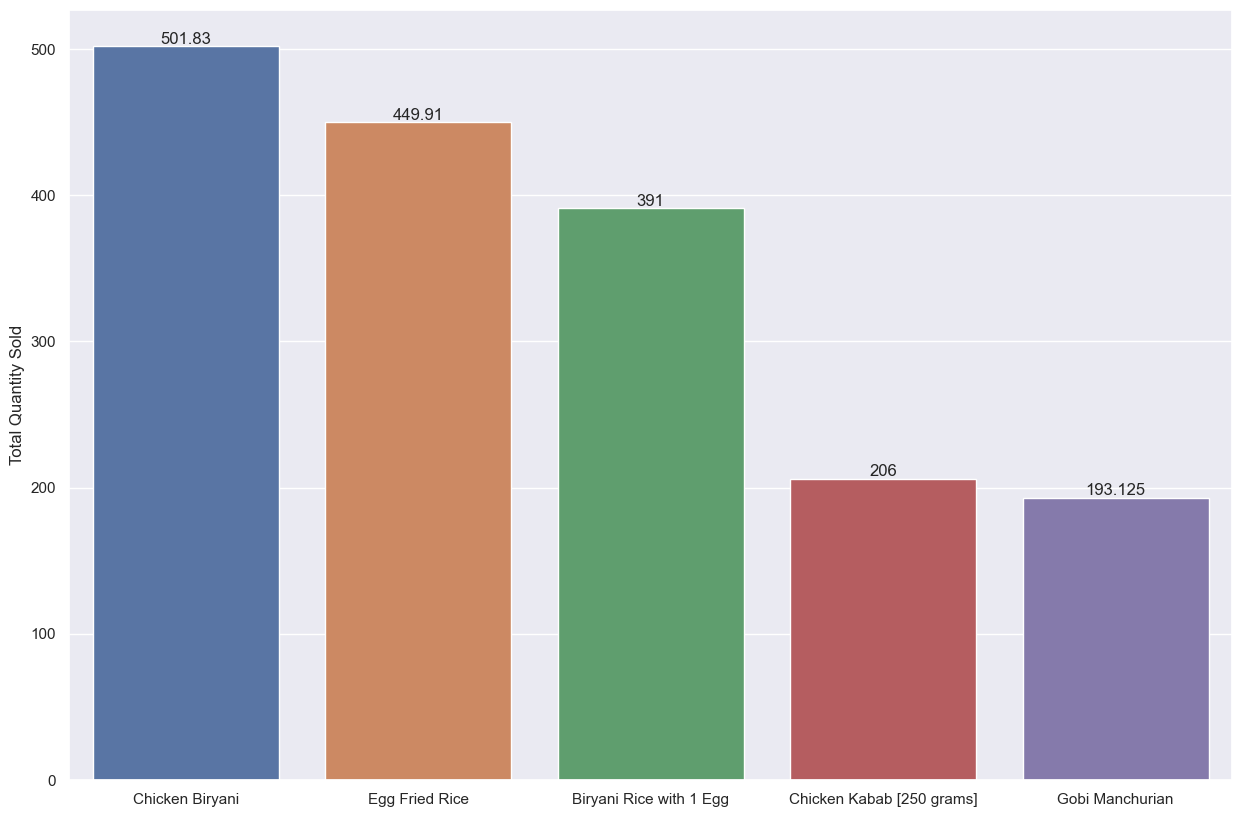

In [216]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=items_sold.index,y=items_sold['Total Quantity Sold'])
for i in ax.containers:
    ax.bar_label(i)
plt.show()

- From above analysis we can see that Chicken Biryani was sold mostly in Bengaluru indicating that most of people like non-veg
- Egg Fried Rice was sold mostly after Chicken Biryani in Bengaluru
- Gobi Manchurian was at last position among top 5 items sold in Bengaluru

In [222]:
item_data.head()

,Restaurant ID,Subzone,City,Item name,Item category,Item subcategory,Metric,April,May,June,July,August,September
0,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Item quantity sold,2.0,4.00,1.0,1.0,2.0,1.0
1,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Unit cost of item (₹),65.0,65.00,65.0,65.0,65.0,1.0
2,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Orders with item,2.0,3.00,1.0,1.0,1.0,1.0
3,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Item quantity per order,1.0,1.33,1.0,1.0,2.0,1.0
4,779511,JP Nagar,Bengaluru,2 Parotta,Breads,Breads,Item rating,0.0,0.67,1.0,1.0,1.0,1.0


## Zone-Wise Total Orders

In [225]:
zone_orders= item_data.groupby(['Subzone','Metric'])[['April','May','June','July','August','September']].sum()
zone_orders.head()

April      May     June     July   August  \
Subzone Metric                                                                  
BTM     Item quantity per order    63.805    73.50    69.10    63.12    60.75   
        Item quantity sold         73.475    99.50    91.60    76.62    92.00   
        Item rating                56.275    65.74    66.36    42.49    44.86   
        Orders with item           68.475    90.50    84.60    60.62    88.00   
        Unit cost of item (₹)    1875.475  2365.50  1857.60  2164.62  3047.00   

                                 September  
Subzone Metric                              
BTM     Item quantity per order      56.00  
        Item quantity sold           59.00  
        Item rating                  53.75  
        Orders with item             56.00  
        Unit cost of item (₹)       554.00

In [230]:
i=3
d={}
while i<len(zone_orders):
    d[zone_orders.index[i][0]]=zone_orders.values[i]
    i+=5

In [231]:
zone_orders= pd.DataFrame(data=d)
zone_orders

,BTM,HSR,JP Nagar,Kengeri,Magadi Road,Nagarbhavi,Rajarajeshwari Nagar,Uttarahalli,"Varthur Main Road, Whitefield",Vijay Nagar,Yelahanka
0,68.475,8.295,112.515,56.92,678.885,102.365,148.88,13.665,23.555,282.88,31.22
1,90.500,10.500,161.000,60.00,680.000,129.000,161.00,16.000,29.000,269.50,36.50
2,84.600,9.400,105.800,58.80,756.400,100.800,159.20,18.600,16.000,233.20,34.40
3,60.620,8.060,110.360,45.66,778.240,80.780,142.92,18.060,29.080,200.08,35.22
4,88.000,8.000,77.500,54.75,817.000,87.750,171.00,15.500,20.250,207.75,39.50
5,56.000,7.000,48.000,44.00,155.000,70.000,83.00,11.000,12.000,119.00,24.00


In [232]:
zone_orders= zone_orders.T
zone_orders

,0,1,2,3,4,5
BTM,68.475,90.5,84.6,60.62,88.00,56.0
HSR,8.295,10.5,9.4,8.06,8.00,7.0
JP Nagar,112.515,161.0,105.8,110.36,77.50,48.0
Kengeri,56.920,60.0,58.8,45.66,54.75,44.0
Magadi Road,678.885,680.0,756.4,778.24,817.00,155.0
Nagarbhavi,102.365,129.0,100.8,80.78,87.75,70.0
Rajarajeshwari Nagar,148.880,161.0,159.2,142.92,171.00,83.0
Uttarahalli,13.665,16.0,18.6,18.06,15.50,11.0
"Varthur Main Road, Whitefield",23.555,29.0,16.0,29.08,20.25,12.0
Vijay Nagar,282.880,269.5,233.2,200.08,207.75,119.0


In [233]:
zone_orders.columns=['April','May','June','July','August','September']
zone_orders

,April,May,June,July,August,September
BTM,68.475,90.5,84.6,60.62,88.00,56.0
HSR,8.295,10.5,9.4,8.06,8.00,7.0
JP Nagar,112.515,161.0,105.8,110.36,77.50,48.0
Kengeri,56.920,60.0,58.8,45.66,54.75,44.0
Magadi Road,678.885,680.0,756.4,778.24,817.00,155.0
Nagarbhavi,102.365,129.0,100.8,80.78,87.75,70.0
Rajarajeshwari Nagar,148.880,161.0,159.2,142.92,171.00,83.0
Uttarahalli,13.665,16.0,18.6,18.06,15.50,11.0
"Varthur Main Road, Whitefield",23.555,29.0,16.0,29.08,20.25,12.0
Vijay Nagar,282.880,269.5,233.2,200.08,207.75,119.0


In [236]:
zone_orders['Total_Orders']= zone_orders[['April','May','June','July','August','September']].sum(axis=1)
zone_orders

,April,May,June,July,August,September,Total_Orders
BTM,68.475,90.5,84.6,60.62,88.00,56.0,448.195
HSR,8.295,10.5,9.4,8.06,8.00,7.0,51.255
JP Nagar,112.515,161.0,105.8,110.36,77.50,48.0,615.175
Kengeri,56.920,60.0,58.8,45.66,54.75,44.0,320.130
Magadi Road,678.885,680.0,756.4,778.24,817.00,155.0,3865.525
Nagarbhavi,102.365,129.0,100.8,80.78,87.75,70.0,570.695
Rajarajeshwari Nagar,148.880,161.0,159.2,142.92,171.00,83.0,866.000
Uttarahalli,13.665,16.0,18.6,18.06,15.50,11.0,92.825
"Varthur Main Road, Whitefield",23.555,29.0,16.0,29.08,20.25,12.0,129.885
Vijay Nagar,282.880,269.5,233.2,200.08,207.75,119.0,1312.410


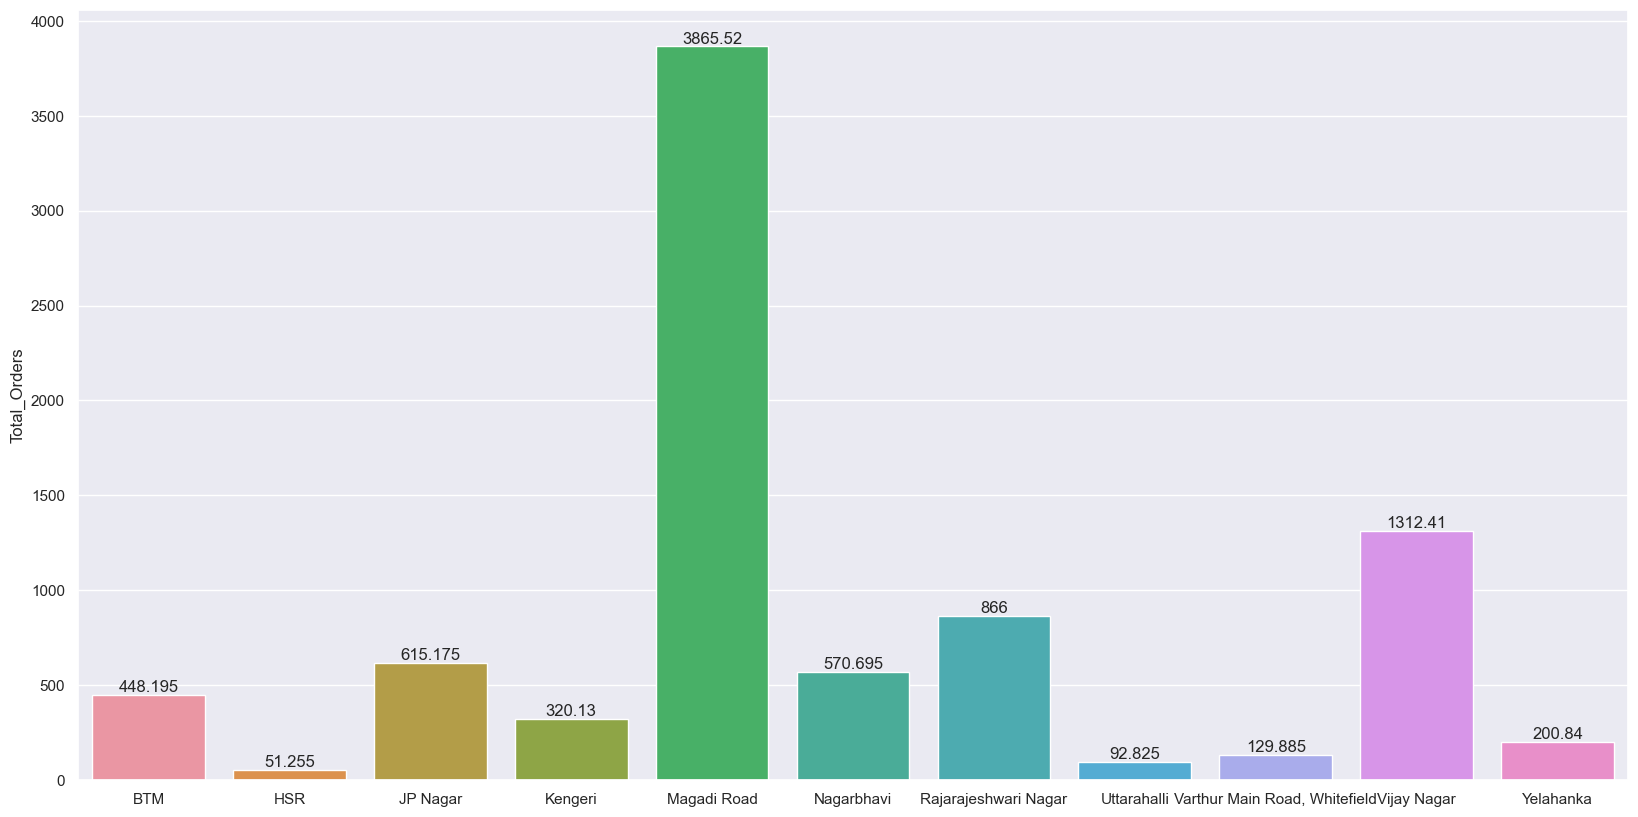

In [241]:
plt.figure(figsize=(20,10),dpi=100)
ax=sns.barplot(x=zone_orders.index,y=zone_orders['Total_Orders'])
for i in ax.containers:
    ax.bar_label(i)
plt.show()

- From above analysis we can see that Magadi Road subzone had highest number of total orders placed
- HSR subzone had least number of total orders placed
- Vijay Nagar subzone had the 2nd highest number of total orders placed

In [242]:
detailed_data.head()

,Restaurant ID,Subzone,City,Overview,Metric,April,May,June,July,August,September
0,802364,JP Nagar,Bengaluru,Sales,Sales (Rs),5527.00,8759.00,5812.00,5429.00,4260.00,1118.00
1,802364,JP Nagar,Bengaluru,Sales,Delivered orders,25.00,36.00,25.00,25.00,17.00,5.00
2,802364,JP Nagar,Bengaluru,Sales,Average order value (Rs),221.08,243.31,232.48,217.16,250.59,223.60
3,802364,JP Nagar,Bengaluru,Sales,Market share (%),0.03,0.07,0.04,0.07,0.52,1.48
4,802364,JP Nagar,Bengaluru,Customer experience,Average rating,2.19,2.27,1.78,2.08,1.13,3.78


## Total Delivered Orders in each Zone

In [245]:
sales_df= detailed_data[detailed_data['Overview']=='Sales']
sales_df.head()

,Restaurant ID,Subzone,City,Overview,Metric,April,May,June,July,August,September
0,802364,JP Nagar,Bengaluru,Sales,Sales (Rs),5527.00,8759.00,5812.00,5429.00,4260.00,1118.00
1,802364,JP Nagar,Bengaluru,Sales,Delivered orders,25.00,36.00,25.00,25.00,17.00,5.00
2,802364,JP Nagar,Bengaluru,Sales,Average order value (Rs),221.08,243.31,232.48,217.16,250.59,223.60
3,802364,JP Nagar,Bengaluru,Sales,Market share (%),0.03,0.07,0.04,0.07,0.52,1.48
46,69042,Vijay Nagar,Bengaluru,Sales,Sales (Rs),8608.20,6976.00,6112.00,10074.00,9521.00,844.00


In [258]:
zone_sales= sales_df.groupby(['Subzone','Metric'])[['April','May','June','July','August','September']].sum()
zone_sales.head()

April      May     June     July   August  \
Subzone Metric                                                                  
BTM     Average order value (Rs)   507.10   570.75   425.17   511.55   397.48   
        Delivered orders            11.00    22.00    19.00    16.00    24.00   
        Market share (%)             0.22     0.25     0.18     0.16     0.28   
        Sales (Rs)                3199.00  4899.00  4012.00  4092.40  6106.00   
HSR     Average order value (Rs)     0.00     0.00    99.00   158.00     0.00   

                                  September  
Subzone Metric                               
BTM     Average order value (Rs)     187.40  
        Delivered orders               5.00  
        Market share (%)               0.39  
        Sales (Rs)                   937.00  
HSR     Average order value (Rs)       0.00

In [259]:
i=1
d={}
while i<len(zone_sales):
    d[zone_sales.index[i][0]]=zone_sales.values[i]
    i+=4

In [260]:
zone_sales= pd.DataFrame(data=d)
zone_sales= zone_sales.T
zone_sales

,0,1,2,3,4,5
BTM,11.0,22.0,19.0,16.0,24.0,5.0
HSR,0.0,0.0,1.0,1.0,0.0,0.0
JP Nagar,47.0,76.0,43.0,48.0,25.0,5.0
Kengeri,9.0,5.0,6.0,7.0,8.0,1.0
Magadi Road,331.0,321.0,366.0,376.0,393.0,52.0
Nagarbhavi,27.0,23.0,11.0,15.0,13.0,3.0
Rajarajeshwari Nagar,39.0,39.0,34.0,35.0,43.0,6.0
Uttarahalli,1.0,3.0,4.0,5.0,4.0,0.0
"Varthur Main Road, Whitefield",3.0,3.0,2.0,2.0,3.0,0.0
Vijay Nagar,126.0,88.0,79.0,68.0,59.0,8.0


In [261]:
zone_sales.columns=['April','May','June','July','August','September']
zone_sales['Total Delivered Orders']= zone_sales[['April','May','June','July','August','September']].sum(axis=1)
zone_sales

,April,May,June,July,August,September,Total Delivered Orders
BTM,11.0,22.0,19.0,16.0,24.0,5.0,97.0
HSR,0.0,0.0,1.0,1.0,0.0,0.0,2.0
JP Nagar,47.0,76.0,43.0,48.0,25.0,5.0,244.0
Kengeri,9.0,5.0,6.0,7.0,8.0,1.0,36.0
Magadi Road,331.0,321.0,366.0,376.0,393.0,52.0,1839.0
Nagarbhavi,27.0,23.0,11.0,15.0,13.0,3.0,92.0
Rajarajeshwari Nagar,39.0,39.0,34.0,35.0,43.0,6.0,196.0
Uttarahalli,1.0,3.0,4.0,5.0,4.0,0.0,17.0
"Varthur Main Road, Whitefield",3.0,3.0,2.0,2.0,3.0,0.0,13.0
Vijay Nagar,126.0,88.0,79.0,68.0,59.0,8.0,428.0


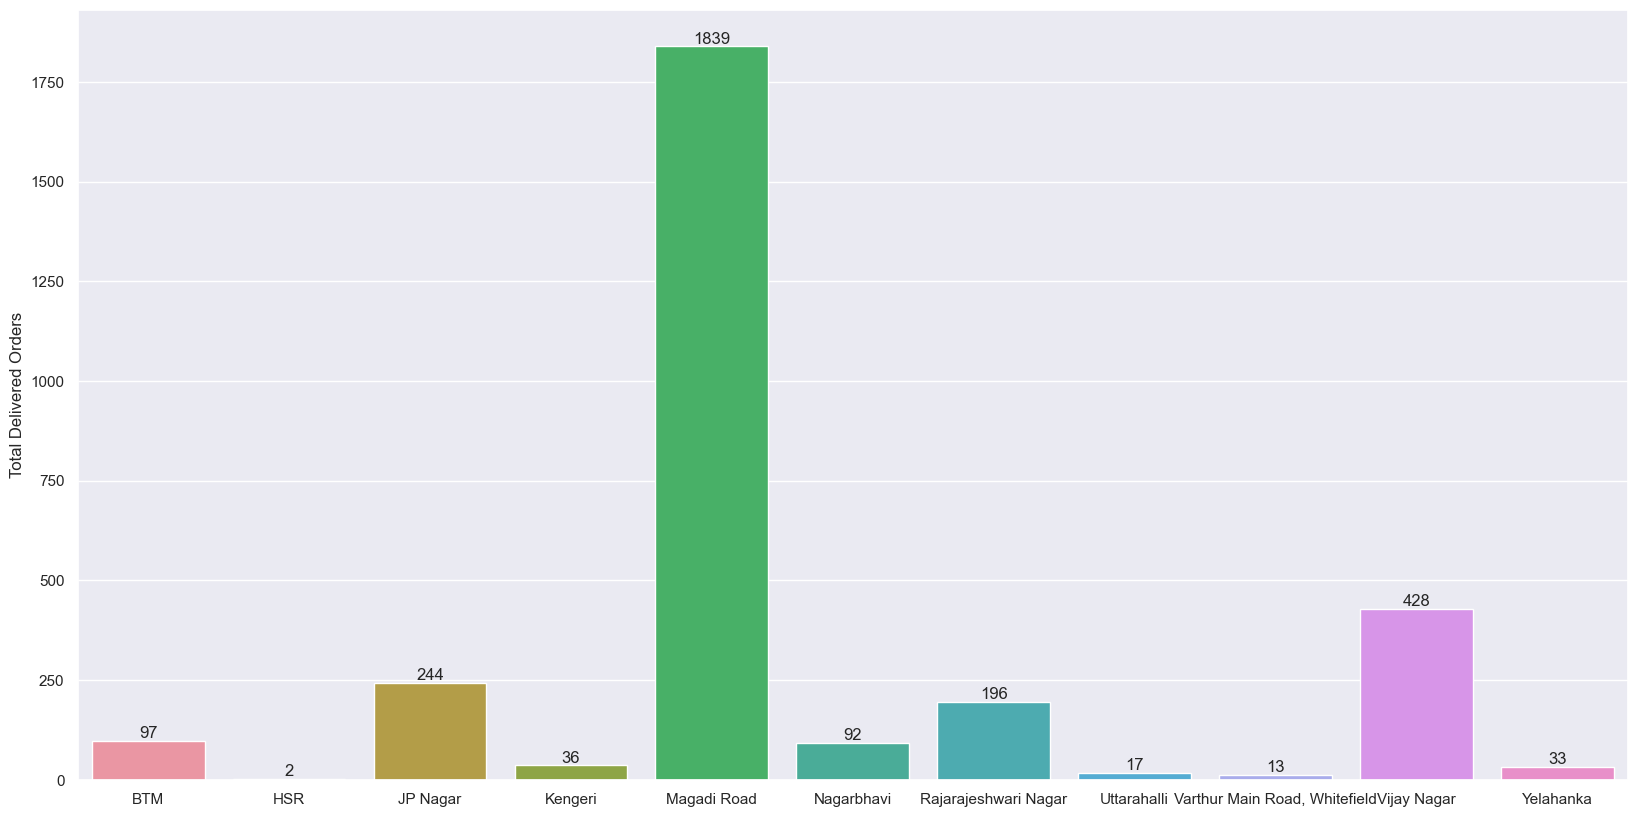

In [262]:
plt.figure(figsize=(20,10),dpi=100)
ax=sns.barplot(x=zone_sales.index,y=zone_sales['Total Delivered Orders'])
for i in ax.containers:
    ax.bar_label(i)
plt.show()

- From above analysis we can see that Magadi Road subzone had highest number of delivered orders
- HSR subzone had least number of delivered orders
- Vijay Nagar subzone had the 2nd highest number of delivered orders